In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime

from keras.models import Sequential
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense,Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras import regularizers, optimizers
from keras.optimizers import Adam

from keras.applications import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetMobile


from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20,10)

def append_ext(fn):
    return fn+".tif"


import os
print(os.listdir("input"))

Using TensorFlow backend.
/home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kuat/.virtualenvs/ca

['train_labels.csv', 'sample_submission.csv', 'test', 'train']


In [2]:
import matplotlib


# import the necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
import random
import shutil



from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import save_img
from keras.callbacks import LearningRateScheduler
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.models import load_model
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
from PIL import Image
from keras.optimizers import Adagrad

## Root model results

In [3]:
val_datagen = ImageDataGenerator(rescale = 1 / 255.0)
testGen = val_datagen.flow_from_directory(
    directory='test-b/',
    class_mode="categorical",
    target_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    batch_size=32)

Found 791 images belonging to 2 classes.


In [5]:
model = load_model('DenseNet121.h5')

W0425 04:24:23.625941 139913165494080 deprecation_wrapper.py:119] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0425 04:24:24.564568 139913165494080 deprecation_wrapper.py:119] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0425 04:25:09.226715 139913165494080 deprecation_wrapper.py:119] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [6]:
totalTest = len(os.listdir('test-b/1')) + len(os.listdir('test-b/0'))

In [7]:
predIdxs1 = model.predict_generator(testGen,verbose=2,steps=(totalTest // 32) + 1)

In [8]:
predIdxs1 = np.argmax(predIdxs1, axis=1)

In [10]:
print(classification_report(testGen.classes, predIdxs1,
			target_names=testGen.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       248
           1       0.99      1.00      0.99       543

    accuracy                           0.99       791
   macro avg       0.99      0.98      0.99       791
weighted avg       0.99      0.99      0.99       791



In [11]:
cm = confusion_matrix(testGen.classes, predIdxs1)                               #CHANGED EVERY testGen to valGen


In [12]:
cm

array([[241,   7],
       [  2, 541]])

In [84]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("heatmap", dpi = 800)
    plt.show()

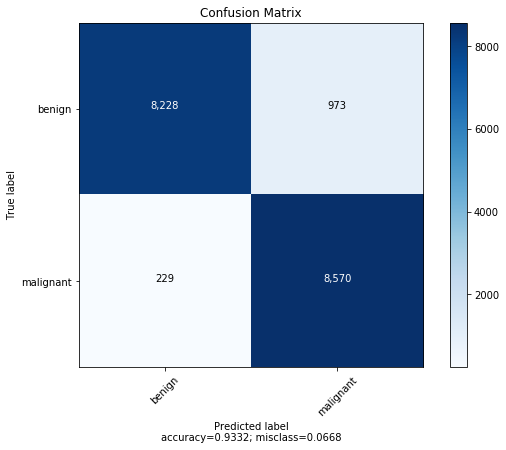

In [153]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ["benign", "malignant"],
                      title        = "Confusion Matrix")

## interchange results

In [11]:
traindf=pd.read_csv("input/train_labels.csv",dtype=str)
train_size = 180000
traindf = traindf.sort_values(by=['label','id'])
traindf = traindf.iloc[:int(train_size/2)].append(traindf.iloc[-int(train_size/2):])
traindf["id"]=traindf["id"].apply(append_ext)

In [96]:
dataset = traindf
dataset_copy = dataset.copy()
train_set = dataset_copy.sample(frac=0.99, random_state=0)
test_set = dataset_copy.drop(train_set.index)
train_set['label'].value_counts()


0    89960
1    88240
Name: label, dtype: int64

In [97]:
test_set['label'].value_counts()

0    923
1    877
Name: label, dtype: int64

In [98]:
B_size = 128
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generatorForDense=test_datagen.flow_from_dataframe(
                                                dataframe=test_set,
                                                directory="input/train/",
                                                x_col="id",
                                                y_col="label",
                                                batch_size=B_size,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="binary",
                                                target_size=(224, 224)
)

Found 1800 validated image filenames belonging to 2 classes.


In [30]:
model = load_model('DenseNet121.h5')

In [ ]:
predForDense = model.predict_generator(test_generatorForDense,verbose=2,steps=(1800 // 128) + 1)

In [50]:
predForDense = np.rint(predForDense)

In [52]:
predForDense = np.argmax(predForDense, axis=1)

In [53]:
print(classification_report(test_generatorForDense.classes, predForDense))

              precision    recall  f1-score   support

           0       0.82      0.05      0.09       181
           1       0.51      0.99      0.67       179

    accuracy                           0.52       360
   macro avg       0.66      0.52      0.38       360
weighted avg       0.66      0.52      0.38       360



In [55]:
cmForDense = confusion_matrix(test_generatorForDense.classes, predForDense)    

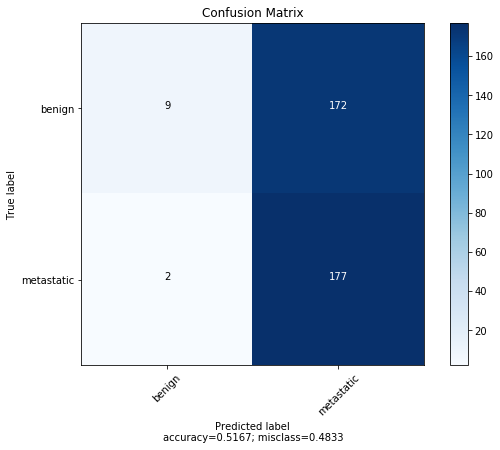

In [59]:
plot_confusion_matrix(cmForDense, 
                      normalize    = False,
                      target_names = ["benign", "m"],
                      title        = "Confusion Matrix")

## PyCam

In [48]:
traindf=pd.read_csv("input/train_labels.csv",dtype=str)
train_size = 180000
traindf = traindf.sort_values(by=['label','id'])
traindf = traindf.iloc[:int(train_size/2)].append(traindf.iloc[-int(train_size/2):])
traindf["id"]=traindf["id"].apply(append_ext)

In [49]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [50]:
traindf['label'].value_counts()

0    90883
1    89117
Name: label, dtype: int64

In [55]:
dataset = traindf
dataset_copy = dataset.copy()
train_set = dataset_copy.sample(frac=0.99, random_state=0)
test_set = dataset_copy.drop(train_set.index)
train_set['label'].value_counts()

0    89960
1    88240
Name: label, dtype: int64

In [56]:
test_set['label'].value_counts()

0    923
1    877
Name: label, dtype: int64

In [8]:
train_set

,id,label
179302,0066c329c4e019ffb2af34f732371c6802d25711.tif,1
159613,742aae661d3991afbf775b37db6524669ab3f188.tif,0
132256,a759a82c469f0640ee9aba51e49de1a19b70eb27.tif,1
139962,3e0636a62893f7652721df53bd740f4844c8a012.tif,0
97926,bb515931c2a1e2aebd96047d4b155479ffd813ba.tif,1
...,...,...
44346,0f02f2aded23845ac011ab38b98c4e111f261c04.tif,1
113308,eb8ad787ee661034bf3943c6c8b9504c69e47ce5.tif,1
306,86b5de79c16d0ff8f1df0eeb6e1684e3f9467caf.tif,0
76706,8a470baf6b9283a2da23116295d80f25e50aec49.tif,0


In [9]:
B_size = 128

train_generator=datagen.flow_from_dataframe(
                                            dataframe=train_set,
                                            directory="input/train/",
                                            x_col="id",
                                            y_col="label",
                                            subset="training",
                                            batch_size=B_size,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(96, 96)
)

valid_generator=datagen.flow_from_dataframe(
                                            dataframe=train_set,
                                            directory="input/train/",
                                            x_col="id",
                                            y_col="label",
                                            subset="validation",
                                            batch_size=B_size,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(96, 96)
)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=test_set,
                                                directory="input/train/",
                                                x_col="id",
                                                y_col="label",
                                                batch_size=B_size,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="binary",
                                                target_size=(96, 96)
)

Found 121500 validated image filenames belonging to 2 classes.
Found 40500 validated image filenames belonging to 2 classes.
Found 18000 validated image filenames belonging to 2 classes.


In [10]:
len(test_generator.labels)

18000

In [11]:
def auc(y_true, y_pred):
    """ROC AUC metric evaluator"""
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [70]:
dependencies = {
    'auc': auc
}
modelPyCam = load_model('final-kaggle-final.h5',custom_objects=dependencies)

W0407 09:04:34.138165 139806992152384 deprecation.py:323] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/ops/metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0407 09:04:43.153556 139806992152384 deprecation.py:323] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
import tensorflow as tf 

In [20]:
mVGG16 = tf.keras.models.load_model('vgg16.h5')

W0424 06:53:42.617220 139754341742400 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [57]:
test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=test_set,
                                                directory="input/train/",
                                                x_col="id",
                                                y_col="label",
                                                batch_size=1,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="binary",
                                                target_size=(96, 96)
)

Found 1800 validated image filenames belonging to 2 classes.


In [58]:
predVGG16 = mVGG16.predict_generator(test_generator,verbose=2)

1800/1800 - 62s


In [73]:
predictions = predVGG16.copy()

In [74]:
predictions

array([[0.9821535 ],
       [0.99766636],
       [0.9304237 ],
       ...,
       [0.00223506],
       [0.00858625],
       [0.01074968]], dtype=float32)

In [71]:
predPyCam = modelPyCam.predict_generator(test_generator,verbose=2)

In [44]:
predictions = predPyCam.copy()

NameError: name 'predPyCam' is not defined

In [66]:
len(predictions)

1800

In [75]:
predictions = np.rint(predictions)

In [70]:
predictions = np.argmax(predictions, axis = 1)

In [78]:
for i in range(len(predictions)):
    if predictions[i] == 1:
        predictions[i] = 0
    else:
        predictions[i] = 1

In [79]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [81]:
print(classification_report(test_generator.classes, predictions,
			target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       923
           1       0.98      0.90      0.94       877

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



In [85]:
cm = confusion_matrix(test_generator.classes, predictions) 

In [89]:
sensitivity0 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])
sensitivity = (sensitivity1+sensitivity0)/2

In [90]:
sensitivity

0.9389947261853728

In [91]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total

In [92]:
acc

0.94

In [93]:
f1 = 2*((sensitivity0*sensitivity1)/(sensitivity0+sensitivity1))

In [94]:
f1

0.937346810702431

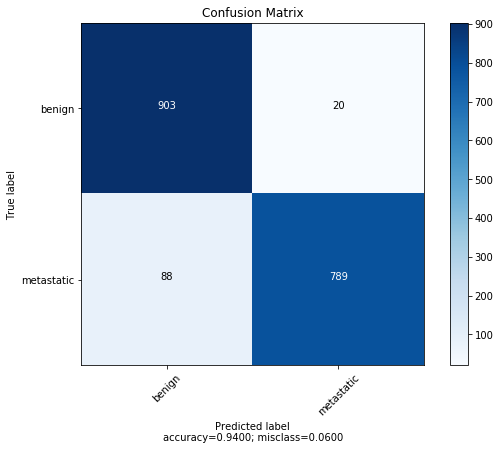

In [86]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ["benign", "metastatic"],
                      title        = "Confusion Matrix")

## NASNet


In [ ]:
modelNasNet = tf.keras.models.load_model('NASNet.h5')

W0425 09:59:55.861011 140496094373696 deprecation.py:573] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
W0425 09:59:55.889614 140496094373696 deprecation.py:506] From /home/kuat/.virtualenvs/capstone/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [120]:
test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=test_set,
                                                directory="input/train/",
                                                x_col="id",
                                                y_col="label",
                                                batch_size=1,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="binary",
                                                target_size=(96, 96)
)

Found 1800 validated image filenames belonging to 2 classes.


In [121]:
predNasNet = modelNasNet.predict_generator(test_generator,verbose=1)

1800/1800 [==============================] - 200s 111ms/step


In [127]:
predictions = predNasNet.copy()

In [128]:
predictions

array([[1.5414067e-01],
       [5.0237909e-04],
       [8.0048621e-01],
       ...,
       [9.1147846e-01],
       [4.5999404e-04],
       [6.0472703e-01]], dtype=float32)

In [129]:
predictions = np.rint(predictions)

In [130]:
predictions

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [110]:
for i in range(len(predictions)):
    if predictions[i] == 1:
        predictions[i] = 0
    else:
        predictions[i] = 1

In [112]:
predictions

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [131]:
print(classification_report(test_generator.classes, predictions,
			target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       923
           1       0.71      0.57      0.64       877

    accuracy                           0.68      1800
   macro avg       0.69      0.68      0.68      1800
weighted avg       0.69      0.68      0.68      1800



In [13]:
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [14]:
cm

array([[241,   7],
       [  2, 541]])

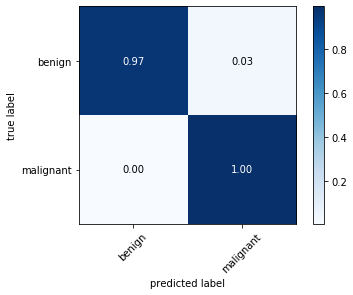

<Figure size 432x288 with 0 Axes>

In [15]:


multiclass = cm

class_names = ['benign', 'malignant']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.show()
plt.savefig('mal_mat.png')

## PyCam with breakhis

In [82]:
val_datagen = ImageDataGenerator(rescale = 1 / 255.0)
testGenBreakHis = val_datagen.flow_from_directory(
    directory='test-b/',
    class_mode="categorical",
    target_size=(96,96),
    color_mode="rgb",
    shuffle=False,
    batch_size=32)

Found 791 images belonging to 2 classes.


In [83]:
predBreakHis = modelPyCam.predict_generator(testGenBreakHis,verbose=2)

In [86]:
predBreakHis = np.rint(predBreakHis)

In [89]:
print(classification_report(testGenBreakHis.classes, predBreakHis))

              precision    recall  f1-score   support

           0       0.36      0.87      0.51       248
           1       0.83      0.29      0.44       543

    accuracy                           0.48       791
   macro avg       0.60      0.58      0.47       791
weighted avg       0.69      0.48      0.46       791



In [90]:
cm1 = confusion_matrix(testGenBreakHis.classes, predBreakHis) 

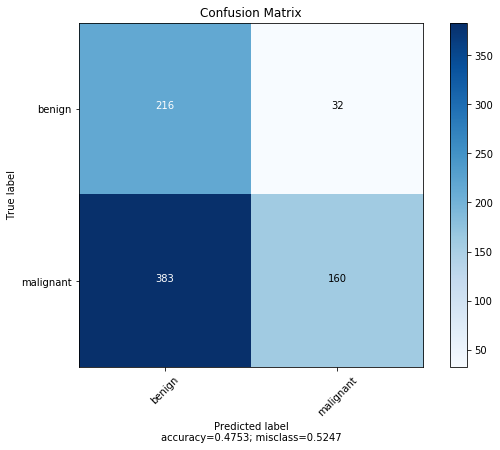

In [91]:
plot_confusion_matrix(cm1, 
                      normalize    = False,
                      target_names = ["benign", "malignant"],
                      title        = "Confusion Matrix")

In [ ]:
testdf=pd.read_csv("input/train_labels.csv",dtype=str)
test_size = 50000
testdf = testdf.sort_values(by=['label','id'])
testdf = testdf.iloc[:int(test_size/2)].append(testdf.iloc[-int(test_size/2):])
testdf["id"]=testdf["id"].apply(append_ext)

In [ ]:
B_size = 512
datagen=ImageDataGenerator(rescale=1./255.)
test_generator=datagen.flow_from_dataframe(
                                                dataframe=testdf,
                                                directory="input/train/",
                                                x_col="id",
                                                y_col="label",
                                                batch_size=B_size,
                                                seed=42,
                                                shuffle=True,
                                                class_mode="binary",
                                                target_size=(96, 96)
)

In [ ]:
from keras.models import load_model

In [ ]:
def auc(y_true, y_pred):
    """ROC AUC metric evaluator"""
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [ ]:
dependencies = {
    'auc': auc
}
model = load_model('kuat.h5',custom_objects=dependencies)

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [ ]:
traindf=pd.read_csv("input/train_labels.csv",dtype=str)
train_size = 180000
traindf = traindf.sort_values(by=['label','id'])
traindf = traindf.iloc[:int(train_size/2)].append(traindf.iloc[-int(train_size/2):])
testdf=pd.read_csv("input/sample_submission.csv",dtype=str)
traindf["id"]=traindf["id"].apply(append_ext)
testdf["id"]=testdf["id"].apply(append_ext)
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
B_size = 512

train_generator=datagen.flow_from_dataframe(
                                            dataframe=traindf,
                                            directory="input/train/",
                                            x_col="id",
                                            y_col="label",
                                            subset="training",
                                            batch_size=B_size,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(96, 96)
)

valid_generator=datagen.flow_from_dataframe(
                                            dataframe=traindf,
                                            directory="input/train/",
                                            x_col="id",
                                            y_col="label",
                                            subset="validation",
                                            batch_size=B_size,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="binary",
                                            target_size=(96, 96)
)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=testdf,
                                                directory="input/test/",
                                                x_col="id",
                                                y_col=None,
                                                batch_size=B_size,
                                                seed=42,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(96, 96)
)

In [ ]:


train_generator.n//train_generator.batch_size



In [ ]:
def auc(y_true, y_pred):
    """ROC AUC metric evaluator"""
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [ ]:
def make_model(model_choice, model_name, input_tensor):
    '''Function to create a model
    Input:
    - model_choice, for ex: VGG19(include_top=False, input_tensor=input_tensor)
    - model_name, (str), name that will be given to the model in tensorboard
    
    Output:
    - model made with keras.model.Model'''
    
    base_model = model_choice
    x = base_model(input_tensor)
    out = Flatten()(x)
    out = Dense(1, activation="sigmoid")(out)
    model = Model(input_tensor, out)
    
    #The only callback we will use is TensorBoard, we could use early stopping or modifying the learning rate
    #but we wanted to compare the models as they were, with the same parameters for each.
    tensorboard=TensorBoard(log_dir = './logs/{}'.format(model_name),
                            histogram_freq=0,
                            batch_size=B_size,
                            write_graph=True,
                            write_grads=True,
                            write_images=False)
    
    model.compile(optimizer=Adam(0.0001), loss=binary_crossentropy, metrics=['accuracy', auc])
    model.summary()
    
    history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5,
                    callbacks=[tensorboard])
    

    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title(model_name +  ' Model AUC')
    plt.legend([model_name +  ' Training',model_name +  ' Validation'])
    plt.ylabel('AUC')
    plt.xlabel('epoch')
    
    return model

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:


input_shape = (96, 96, 3)

ResNet50_model=ResNet50(include_top=False, input_tensor=None, weights='imagenet', input_shape = input_shape)
Rx = ResNet50_model.output
Rx = Flatten()(Rx)
prediction = Dense(1, activation="sigmoid")(Rx)
Rmodel = Model(ResNet50_model.input, prediction)

ResNet50_tensorboard = TensorBoard(log_dir = './logs/{}'.format('ResNet50'),
                                            histogram_freq=0,
                                            batch_size=B_size,
                                            write_graph=True,
                                            write_grads=True,
                                            write_images=False)

Rmodel.compile(optimizer=Adam(0.0001), loss=binary_crossentropy, metrics=['accuracy', auc])



In [ ]:
history = Rmodel.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5,
                    callbacks=[ResNet50_tensorboard]
)
end = datetime.now()